In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [115]:
data = pd.read_excel('diabet.xlsx').to_numpy()
data

array([[ 29,  38, 121],
       [ 46,  48, 218],
       [ 49,  57, 256],
       [ 33,  38, 119],
       [ 44,  41, 183],
       [ 36,  42, 190],
       [ 46,  49, 191],
       [ 34,  39, 170],
       [ 34,  40, 166],
       [ 45,  50, 202],
       [ 39,  45, 156],
       [ 42,  50, 195],
       [ 35,  41, 170],
       [ 37,  43, 165],
       [ 36,  40, 183],
       [ 37,  41, 157],
       [ 37,  43, 183],
       [ 31,  39, 159],
       [ 30,  34, 126],
       [ 46,  51, 196],
       [ 42,  41, 178],
       [ 45,  46, 230],
       [ 48,  55, 288],
       [ 48,  44, 185],
       [ 33,  38, 113],
       [ 28,  36, 118],
       [ 43,  47, 252],
       [ 27,  33, 100],
       [ 31,  38, 145],
       [ 37,  39, 189],
       [ 37,  40, 174],
       [ 29,  35, 139],
       [ 39,  41, 191],
       [ 49,  43, 174],
       [ 32,  34, 118],
       [ 39,  44, 186],
       [ 31,  35, 159],
       [ 46,  49, 205],
       [ 31,  36, 145],
       [ 45,  48, 214],
       [ 35,  40, 160],
       [ 40,  43

In [116]:
# copy from prev lab
def squared_distance(x1, x2):
    s = 0
    for i in range(len(x1)):
        s += (x1[i]-x2[i])**2
    return s

In [117]:
def center_of_2_points(p1, p2):
    return np.mean([p1, p2], axis=0)

In [118]:
def matrix_of_dists(data, distance=squared_distance):
    matrix = np.zeros((data.shape[0], data.shape[0]))
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            matrix[i, j] = distance(data[i], data[j])
            
    return matrix

In [119]:
def get_max_from_matrix(matrix):
    min_value = np.inf
    min_i = 0
    min_j = 0
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            d = matrix[i, j]
            if d < min_value and i != j:
                min_value = d
                min_i = i
                min_j = j
    
    return min_i, min_j, min_value

In [120]:
def get_clusters(unifications, k):
    current_cluster = 1
    assignments = np.zeros(len(unifications)+1)
    
    for i in range(k-1):
        for point in unifications[-1-i][:-1]:
            if assignments[point] == 0:
                assignments[point] = current_cluster
                current_cluster += 1
    
    for p1, p2, _ in unifications[-k::-1]:
        assignments[p2] = assignments[p1]
    
    return assignments

In [121]:
def hierarchy(data, k):
    data = np.copy(data).astype(np.float32)
    unifications = []
    
    for _ in range(data.shape[0]-1):
        matrix = matrix_of_dists(data, distance=squared_distance)
        p1, p2, d = get_max_from_matrix(matrix)
        
        unifications.append([p1, p2, d])
        data[p1] = center_of_2_points(data[p1], data[p2])
        data[p2] = np.nan
    
    cluster_markers = get_clusters(unifications, k)
    
    return unifications, cluster_markers

In [122]:
unifications, cluster_markers_2 = hierarchy(data, 2)
_, cluster_markers_3 = hierarchy(data, 3)
_, cluster_markers_4 = hierarchy(data, 4)
_, cluster_markers_5 = hierarchy(data, 5)

In [123]:
unifications = np.asarray(unifications)
pd.DataFrame({
    'from': unifications[:,0].astype(int),
    'to': unifications[:,1].astype(int),
    'dist': unifications[:,2],
    'new': unifications[:,0].astype(int)
})

,from,to,dist,new
0,32,42,3.000000,32
1,28,38,4.000000,28
2,7,12,5.000000,7
3,26,43,5.000000,26
4,14,16,10.000000,14
5,5,29,11.000000,5
6,9,37,11.000000,9
7,0,25,14.000000,0
8,5,32,14.000000,5
9,15,40,14.000000,15


In [124]:
def plot_clusters(data, cluster_markers, k):
    palette = plt.cm.get_cmap('hsv', k+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(len(data)):
        x, y, z = data[i]
        ax.scatter(x, y, z, color=palette(int(cluster_markers[i])))
    ax.set_xlabel('Waist')
    ax.set_ylabel('Thigh')
    ax.set_zlabel('Weight')

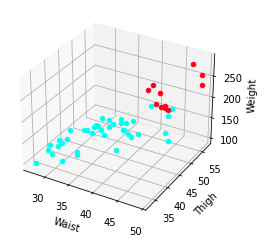

In [125]:
plot_clusters(data, cluster_markers_2, 2)

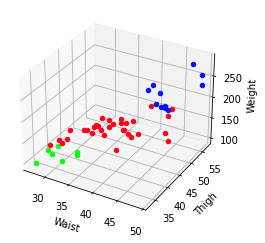

In [126]:
plot_clusters(data, cluster_markers_3, 3)

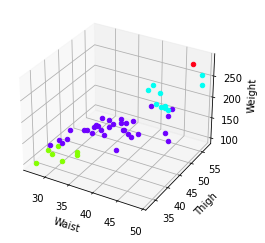

In [127]:
plot_clusters(data, cluster_markers_4, 4)

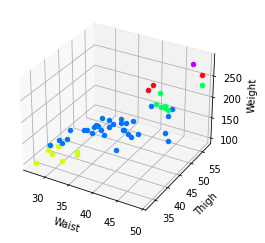

In [128]:
plot_clusters(data, cluster_markers_5, 5)

<h4>Вывод</h4>

Было решено выбрать больше точек чем 20, поскольку этих данных на мой взгляд было недостаточно для должного анализа данных.
Я выбрал 50 точек для сохранения быстродействия алгоритма, с заметным повышением качества полученых результатов.

По итогам, данные наилучшим образом разделены на 3 кластера. Условно их можно обозначить как "Недостаточный вес", "Норма", "Лишний вес". При увеличении количества классов, выделяються малые подгруппы разделяющие пациентов с избыточным весом. Иерархическая кластеризация прошла успешно, разделив пациентов за исходными критериями, что и требовалось показать.